In [1]:
from cfl.experiment import Experiment
import numpy as np
import pandas as pd
from cfl.visualization.basic_visualizations import visualize_macrostates
from sklearn.preprocessing import StandardScaler
from cfl_helpers import *

2025-02-18 11:49:24.655062: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
resolution = '25km'
n_clusters = 10
train_file = f'data/{resolution}_data.csv'
truth_file = f'data/{resolution}_truth.csv'

train_data = pd.read_csv(train_file)
Xraw = np.array(train_data[['lat', 'long']])
Yraw = np.array(train_data['generated_temp']).reshape(-1,1)
print(Xraw.shape, Yraw.shape)

truth = pd.read_csv(truth_file)
true_alt, true_temp = get_alt_temp_grids(truth)

(2026, 2) (2026, 1)


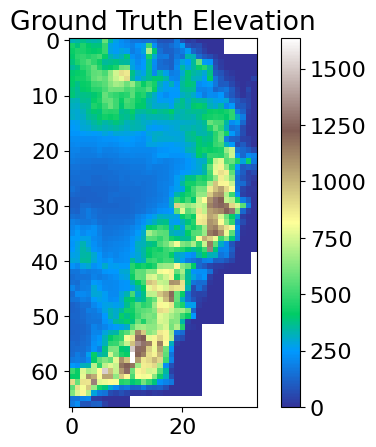

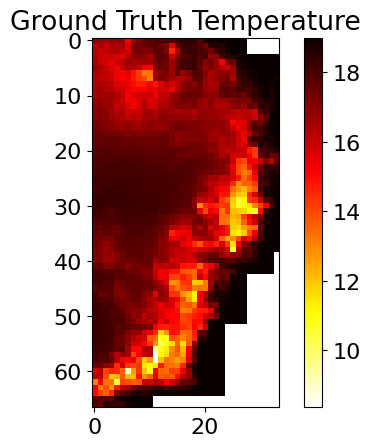

In [3]:
# PLOT TEMP AND ELEVATION FOR RAW DATAFRAME
plt.figure(1)
terr_cmap = plt.get_cmap('terrain')
plt.imshow(true_alt, cmap=terr_cmap, interpolation='nearest')
plt.colorbar()
plt.title('Ground Truth Elevation')
plt.show()

plt.figure(2)
temp_cmap = plt.get_cmap('hot_r')
plt.imshow(true_temp, cmap=temp_cmap, interpolation='nearest')
plt.colorbar()
plt.title('Ground Truth Temperature')
plt.show()

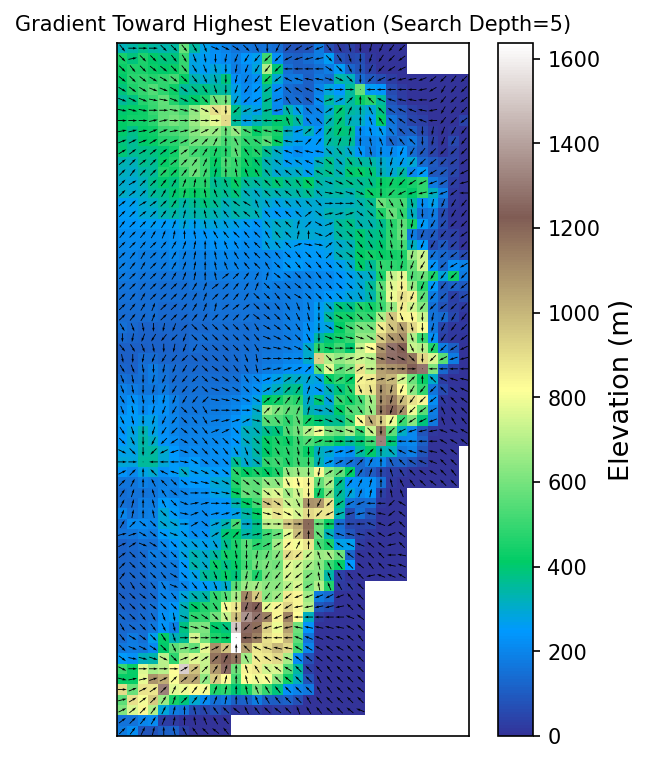

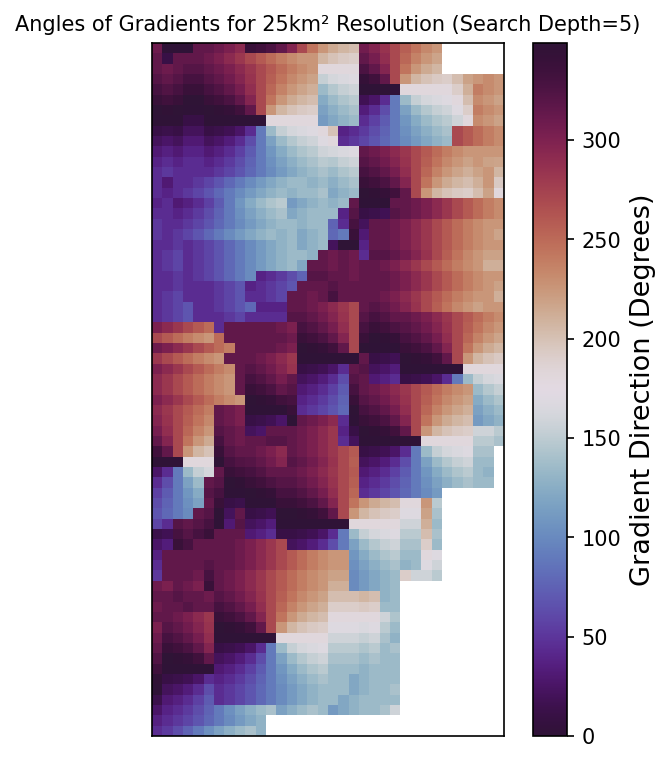

In [5]:
data = true_alt
d = 5
nan_val = -100

U, V = gen_elevation_grads(data, d, nan_val=nan_val)
angles = grad_angles(U, V, title=f'Angles of Gradients for {resolution}² Resolution (Search Depth={d})')